Looking at high-frequency oscillation in nowcast green ssh at Point Atkinson 15 minute files.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime

from salishsea_tools import nc_tools

%matplotlib inline

## A sample nowcast-green output

In [2]:
f = nc.Dataset('/results/SalishSea/nowcast-green/08mar16/PointAtkinson.nc')

ssh = f.variables['sossheig'][:,0,0]
ts =nc_tools.timestamp(f,np.arange(ssh.shape[0]))
dates = [d.datetime for d in ts]

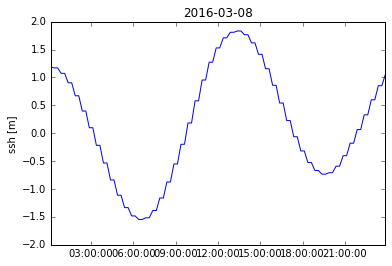

In [3]:
plt.plot(dates,ssh)
plt.title(dates[0].strftime('%Y-%m-%d'))
plt.ylabel('ssh [m]')

In [4]:
ssh[-10:]

array([-0.17877117,  0.06571084,  0.06571084,  0.32868201,  0.32868201,
        0.59840339,  0.59840339,  0.85108906,  0.85108906,  1.05518746], dtype=float32)

* Saw-tooth like behaviour and repeated values.
* Could this be because 15 minutes is not divisible by out 40 second time step?

### Other NEMO 3.6 output (with 40s timestep)
Tested
* 15 minute output
* 10 minute output
* 20 minute output

10 minute output
last 8 ssh:  [ -8.49195659e-01  -7.13157475e-01  -5.74840605e-01  -4.34347630e-01
  -2.90346920e-01  -1.45057648e-01   8.20399509e-05   1.43809989e-01]
15 minute output
last 8 ssh:  [-1.37539923 -1.37539923 -1.01599765 -1.01599765 -0.61179161 -0.61179161
 -0.18381555 -0.18381555]
20 minute output
last 8 ssh:  [-1.79265356 -1.60702991 -1.40031064 -1.1705935  -0.9154433  -0.64399904
 -0.36234728 -0.0724878 ]


(735790.0, 735791.0)

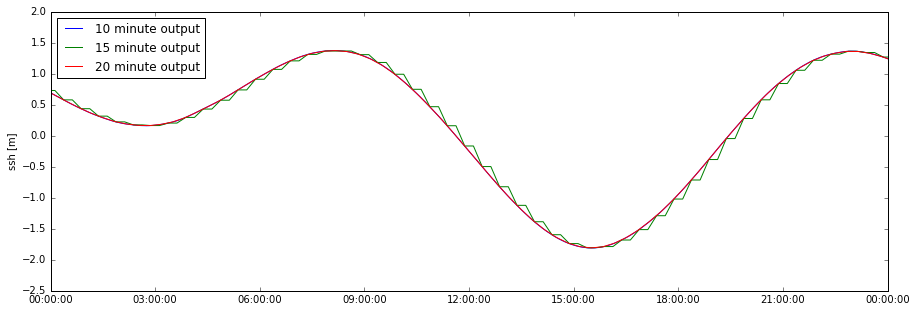

In [5]:
rundir = '/ocean/nsoontie/MEOPAR/SalishSea/results/mixing_paper/holl_jul/'
times = [10,15,20]
fig,ax = plt.subplots(1,1,figsize=(15,5))
for time in times:
    f = nc.Dataset(os.path.join(rundir,'PointAtkinson_{}.nc'.format(time)))
    ssh = f.variables['sossheig'][:,0,0]
    ts =nc_tools.timestamp(f,np.arange(ssh.shape[0]))
    dates = [d.datetime for d in ts]
    ax.plot(dates, ssh,label ='{} minute output'.format(time) )
    ax.legend(loc=0)
    ax.set_ylabel('ssh [m]')
    print('{} minute output'.format(time))
    print('last 8 ssh: ', ssh[-8:])
ax.set_xlim([datetime.datetime(2015,7,11),datetime.datetime(2015,7,12)])

* This saw-tooth behaviour is not present in the 10 minute and 20 minute outputs. So, I think we should switch to 10 minute output in nowcast-green. The behaviors is an artifact of 
* Unfortunately, this run went unstable in Boundary Pass at 15 m depth after ~15000 time steps. Using 
   * 40s timestep
   * kappa/mu=10
   * background visc= 1e-5
   * background diff=1e-6 
   * hollingsworth correction
   * rn_bfri2 = 2e-3
   * ln_loglayer=T
   * rn_bfri2_max = 1.e-1
   * rn_bfrz0=0.0015
   * bathy2
   * TS4 tides

It was in the middle of a spring tides. A run without hollingsworth correction was stable.
